[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/class-visualization/blob/master/classrepresentation.ipynb)

In [0]:
 !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
 !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
 !apt-get update -qq 2>&1 > /dev/null
 !apt-get -y install -qq google-drive-ocamlfuse fuse
 from google.colab import auth
 auth.authenticate_user()
 from oauth2client.client import GoogleCredentials
 creds = GoogleCredentials.get_application_default()
 import getpass
 !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
 vcode = getpass.getpass()
 !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [2]:
!pip install torch
!pip install torchvision
!pip install pillow==4.0.0

    100% |████████████████████████████████| 519.5MB 21kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x561875f6e000 @  0x7f2b658111c4 0x56181c1360d8 0x56181c21fd5d 0x56181c14977a 0x56181c14e462 0x56181c146b3a 0x56181c14e82e 0x56181c146b3a 0x56181c14e82e 0x56181c146b3a 0x56181c14e82e 0x56181c146b3a 0x56181c14ee1f 0x56181c146b3a 0x56181c14e82e 0x56181c146b3a 0x56181c14e82e 0x56181c14e462 0x56181c14e462 0x56181c146b3a 0x56181c14ee1f 0x56181c14e462 0x56181c146b3a 0x56181c14ee1f 0x56181c146b3a 0x56181c14ee1f 0x56181c146b3a 0x56181c14e82e 0x56181c146b3a 0x56181c17750f 0x56181c172202
    100% |████████████████████████████████| 61kB 3.8MB/s 
    100% |████████████████████████████████| 2.0MB 6.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.6MB 4.0MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing in

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms,models
from PIL import Image
from torch import optim

In [5]:
listofimages=[['drive/app/goldfish.jpg',1],
              ['drive/app/hamster.jpg',333],
              ['drive/app/jellyfish.jpg',107]]
index=0
classid=131                         #listofimages[index][1]
model=models.vgg19(pretrained=True)
noise=torch.randn((1,3,224,224))
mean=np.mean(noise.numpy(),axis=(2,3))
mean=torch.from_numpy(mean)
for i in range(3):
  noise[0][i]-=mean[0][i]
  
criterion=torch.nn.MSELoss()
def imagevaluation(image):
  image.requires_grad_()
  optimizer=optim.SGD([image],lr=1000,momentum=0.9)
  epoch=2000
  for i in range(epoch):
    model.zero_grad()
    output=model(image)
    loss=-output[0][classid]
    loss.backward()
    optimizer.step()
    print(loss)
  return image

noise=imagevaluation(noise)

99.7%

tensor(-0.0572, grad_fn=<NegBackward>)
tensor(1.3293, grad_fn=<NegBackward>)
tensor(-20.6403, grad_fn=<NegBackward>)
tensor(-82.4595, grad_fn=<NegBackward>)
tensor(-282.0983, grad_fn=<NegBackward>)
tensor(-1015.0470, grad_fn=<NegBackward>)
tensor(-1974.7712, grad_fn=<NegBackward>)
tensor(-3958.2842, grad_fn=<NegBackward>)
tensor(-8283.9961, grad_fn=<NegBackward>)
tensor(-14237.0654, grad_fn=<NegBackward>)
tensor(-18310.8809, grad_fn=<NegBackward>)
tensor(-22253.6406, grad_fn=<NegBackward>)
tensor(-38467.2539, grad_fn=<NegBackward>)
tensor(-41075.9336, grad_fn=<NegBackward>)
tensor(-68663.5312, grad_fn=<NegBackward>)
tensor(-85901., grad_fn=<NegBackward>)
tensor(-129111.5547, grad_fn=<NegBackward>)
tensor(-155981.3594, grad_fn=<NegBackward>)
tensor(-200135.5469, grad_fn=<NegBackward>)
tensor(-267698.3125, grad_fn=<NegBackward>)
tensor(-318175.2500, grad_fn=<NegBackward>)
tensor(-493833.6875, grad_fn=<NegBackward>)
tensor(-531860.6250, grad_fn=<NegBackward>)
tensor(-521957.8750, grad_fn=

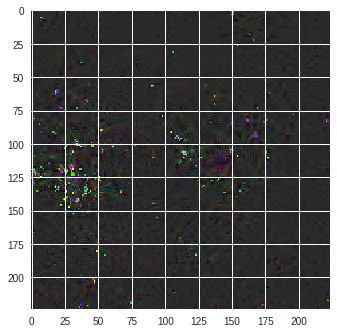

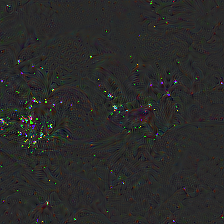

In [30]:

mean=torch.Tensor([0.485, 0.456, 0.406])
std=torch.Tensor([0.229, 0.224, 0.225])
untransform=transforms.ToPILImage()
grayscale=transforms.Grayscale()
def showimage(transformedimage,show,gradient):
    untrans_image=transformedimage.squeeze(0)
    if show==True:
       for i in range(untrans_image.shape[0]):
           untrans_image[i]=(untrans_image[i]*std[i])+mean[i]
    elif gradient==True:
         untrans_image=(untrans_image-untrans_image.min())/untrans_image.max()
    untrans_image=untransform(untrans_image)
    plt.figure()
    plt.imshow(untrans_image)
    plt.show()
    return untrans_image
  
showimage(noise,False,True)